```{custom_download_link} ./Unconstrained_optimization_stripped_1.ipynb
:replace_default: "True"
```

# Bathymetry maps

Click {fa}`rocket` --> {guilabel}`Live Code` to activate live coding on this page!

## Problem
It is desired to determine the number of bathymetry maps $n$ of a local area that should be produced to maximize the profit of a company. The total cost of production and distribution is €$75$ per unit $n$. The revenues are proportional to the number of units multiplied by its price: $Revenues = n \cdot Price $

The demand depends on the price ($n = \sqrt{100 \cdot \left(Price - 150 \right)}$), as shown in the graph:

In [ ]:
import numpy as np
import matplotlib.pylab as plt
%config InlineBackend.figure_formats = ['svg']

n = np.linspace(0,125,100)
price = 150 - 0.01 * n**2
plt.plot(price,n)
plt.ylabel('$n$ (-)')
plt.xlabel('$Price$ (€)')
plt.xlim(0,160)
plt.ylim(0,130)
ax = plt.gca()
ax.grid(True, which='both')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

```{figure} ./figures/revenues-price.png
:name: revenues-price
:width: 600px
$Price = 150 - 0.01n^2$
```

The profit can be estimated as the revenues minus the total costs.

## Model
We need to define our problem in the form of unconstrained optimization {eq}`unconstrained_optimization`.

The function for the profit can be found by combining the relations in the problem statement. However, this is the profit which should be maximized. To turn this into a minimization problem, the profit can be multiplied with $-1$. The final model of this problem results in:

```{math}
:label: unconstrained_optimization_problem

\mathop {\min }\limits_n \left(75n - \left( 150 - 0.01n^2 \right) n \right)
```

:::{card} Test Yourself
<iframe src="https://tudelft.h5p.com/content/1292067269315918707/embed" aria-label="Example 1_linear and convex" width="1088" height="637" frameborder="0" allowfullscreen="allowfullscreen" allow="autoplay *; geolocation *; microphone *; camera *; midi *; encrypted-media *"></iframe><script src="https://tudelft.h5p.com/js/h5p-resizer.js" charset="UTF-8"></script>
:::

### Find best solution manually

An approach to solve this problem might be to try out some values. You can do so in the applet below. The plot below shows the negative profit for some number of bathmetry maps sold.

:::{card} Test yourself
Try and adjust the values for $n$, the number of bathmetry maps sold. How small can you get the negative profit?
<iframe src="../_static/maps.html" style="overflow:hidden;height:500;width:100%" height="500" width="100%"> frameborder="0"></iframe>
:::

As this case is only one-dimensional and the potential range of values is limited, this approach (exhaustive search) is valid: evaluating all possible values for $n$ doesn't take a lot of computing power. The resulting values from the objective function show a clear minimum. For problem in which the objective function required more computational power or the amount of dimensions of the design variables increases, this approach quickly becomes infeasible.

## Method

Now let's solve this problem using an optimization method. This model is described using `scipy.optimize.minimize` according to the [standard structure in this course](./Python_start_3.ipynb)


### Import libraries
For this problem, we'll use all three packages `scipy`, `numpy`, `matplotlib`.

In [1]:
import scipy as sp
%config InlineBackend.figure_formats = ['svg']

In [2]:
import scipy as sp 
import numpy as np
import matplotlib.pylab as plt

### Define the variables
There are very few variables in this problem. In fact, the only variable we have to specify is the initial guess for the optimization algorithm. The objective function will be treated later.
The length of $n$ doesn't have to be specified.

In [3]:
n0 = 20

:::{card} Test Yourself
<iframe src="https://tudelft.h5p.com/content/1292011310223381757/embed" aria-label="Problem 1 variables" width="1088" height="637" frameborder="0" allowfullscreen="allowfullscreen" allow="autoplay *; geolocation *; microphone *; camera *; midi *; encrypted-media *"></iframe><script src="https://tudelft.h5p.com/js/h5p-resizer.js" charset="UTF-8"></script>
:::

### Define the objective function
In the objective function, the formula derived above in {eq}`unconstrained_optimization_problem` ean be inserted. Or, each individual step can be calculated on a seperate line. Again, note that the profit is multiplied with $-1$ to maximize the profit in the minimization formulation.
This results in:

In [4]:
def negprofit(n):
    price = 150 - 0.01 * n**2
    revenues = price * n
    totalcost = 75 * n
    profit = revenues - totalcost
    return -profit

### Solve the problem
Now, the problem can be solved. The result is stored in the variables `result` which is printed.

In [5]:
result = sp.optimize.minimize(negprofit,n0)
print(result)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -2499.9999999998727
        x: [ 5.000e+01]
      nit: 8
      jac: [ 0.000e+00]
 hess_inv: [[ 3.503e-01]]
     nfev: 22
     njev: 11


:::{card} Test Yourself
<iframe src="https://tudelft.h5p.com/content/1292011319959180647/embed" aria-label="Example 1 Solving" width="1088" height="637" frameborder="0" allowfullscreen="allowfullscreen" allow="autoplay *; geolocation *; microphone *; camera *; midi *; encrypted-media *"></iframe><script src="https://tudelft.h5p.com/js/h5p-resizer.js" charset="UTF-8"></script>
:::

### Postprocess results
As seen before, this problem is very small and can be solved by evaluating all possible values (or applying algebra). These values can be plotted and the optimum solution is clearly in the minimum.

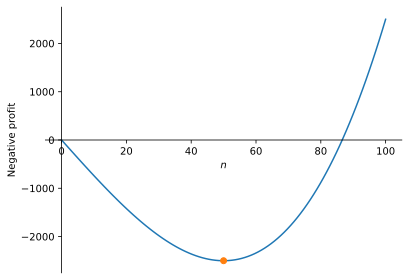

In [6]:
n_range = np.linspace(0,100,100)
negprofit_result = negprofit(n_range)
plt.figure()
plt.plot(n_range,negprofit_result)
plt.plot(result.x,result.fun,'o');
plt.xlabel('$n$')
plt.ylabel('Negative profit');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

:::{card}
<iframe src="https://tudelft.h5p.com/content/1292012050691010717/embed" aria-label="Example 1_postprocessing" width="1088" height="637" frameborder="0" allowfullscreen="allowfullscreen" allow="autoplay *; geolocation *; microphone *; camera *; midi *; encrypted-media *"></iframe><script src="https://tudelft.h5p.com/js/h5p-resizer.js" charset="UTF-8"></script>
:::

## Exercise

:::{card}
Click {fa}`rocket` --> {guilabel}`Live Code` and adapt the code to answer the following question.

<iframe src="https://tudelft.h5p.com/content/1292049357532312317/embed" aria-label="Example 1_exercise 1" width="1088" height="637" frameborder="0" allowfullscreen="allowfullscreen" allow="autoplay *; geolocation *; microphone *; camera *; midi *; encrypted-media *"></iframe><script src="https://tudelft.h5p.com/js/h5p-resizer.js" charset="UTF-8"></script>

<iframe src="https://tudelft.h5p.com/content/1292049366142420277/embed" aria-label="Example 1_exercise 2" width="1088" height="637" frameborder="0" allowfullscreen="allowfullscreen" allow="autoplay *; geolocation *; microphone *; camera *; midi *; encrypted-media *"></iframe><script src="https://tudelft.h5p.com/js/h5p-resizer.js" charset="UTF-8"></script>
:::

## Questions, discussions and comments
<script src="https://utteranc.es/client.js"
        repo="TeachBooks/engineering-systems-optimization"
        issue-term="title"
        theme="github-light"
        crossorigin="anonymous"
        async>
</script>